# IMPORTING LIBRARIES

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# READING IMAGE

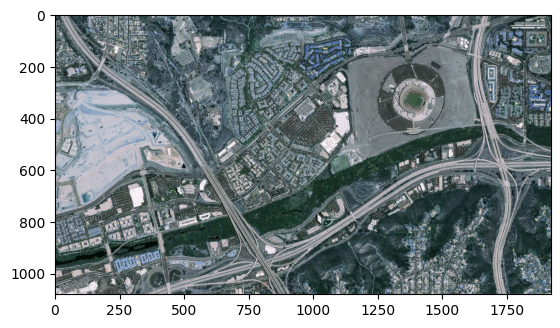

In [5]:
img = cv.imread("satellite.png")
plt.imshow(img)
plt.show()

# GRAYSCALECONVERSION

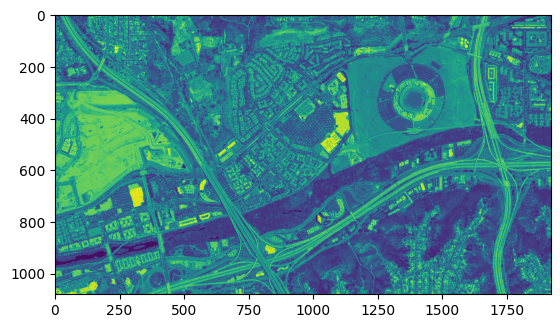

In [7]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

# BLURING AND THRESHOLDING

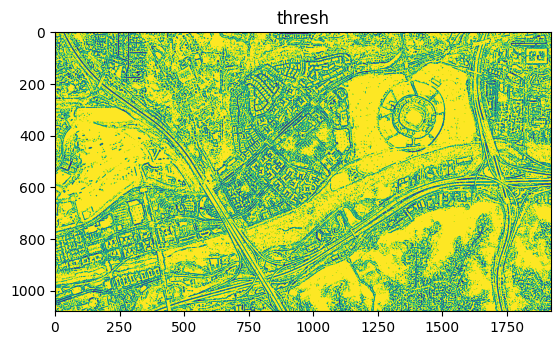

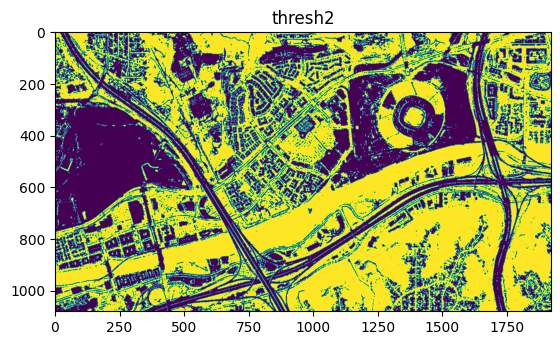

In [9]:
blur = cv.medianBlur(gray,3)
thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 11)
plt.imshow(thresh)
plt.title("thresh")
plt.show()

# USING WEBSITE CODE

blur2 = cv.medianBlur(gray,3)
ret, thresh2 = cv.threshold(blur2,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh2)
plt.title("thresh2")
plt.show()

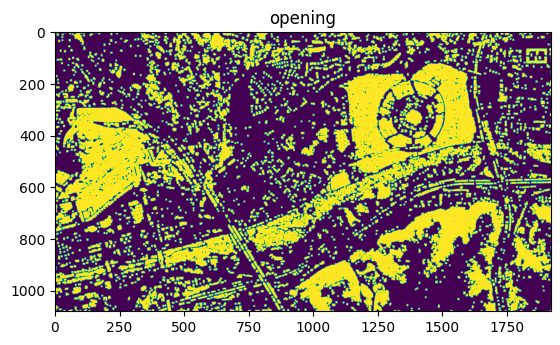

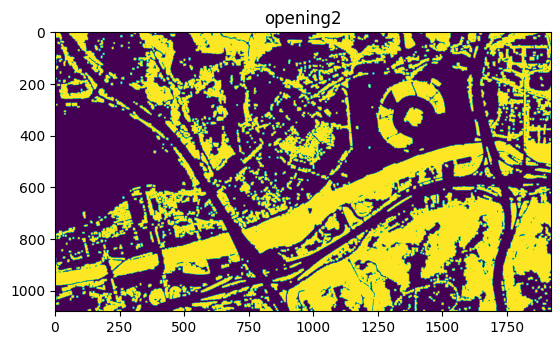

In [10]:
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 3)
plt.imshow(opening)
plt.title("opening")
plt.show()

# USING WEBSITE CODE

opening2 = cv.morphologyEx(thresh2, cv.MORPH_OPEN, kernel, iterations = 3)
plt.imshow(opening2)
plt.title("opening2")
plt.show()

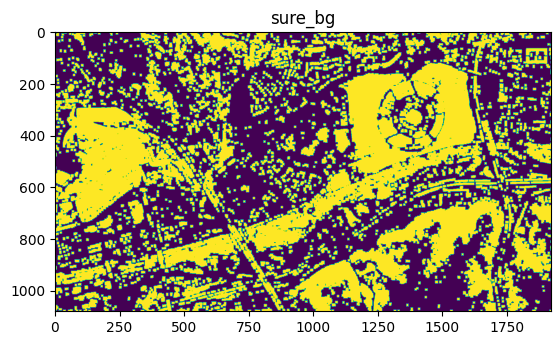

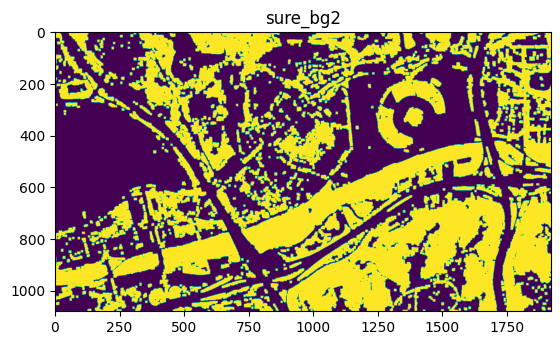

In [11]:
sure_bg = cv.dilate(opening, kernel, iterations = 1)
plt.imshow(sure_bg)
plt.title("sure_bg")
plt.show()

# USING WEBSITE CODE

sure_bg2 = cv.dilate(opening2, kernel, iterations = 1)
plt.imshow(sure_bg2)
plt.title("sure_bg2")
plt.show()

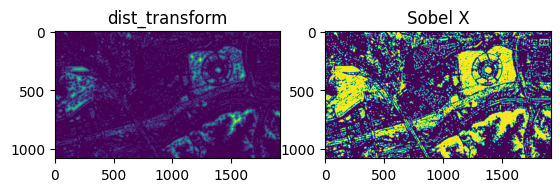

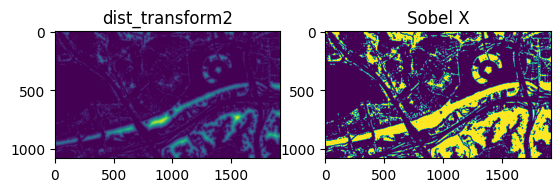

In [12]:
dist_transform = cv.distanceTransform(opening, cv.DIST_L1, 3
                                     )
plt.subplot(1,2,1), plt.imshow(dist_transform)
plt.title('dist_transform'),
ret, sure_fg = cv.threshold(dist_transform,0.05*dist_transform.max(),255,0)
plt.subplot(1,2,2), plt.imshow(sure_fg)
plt.title('Sobel X')
plt.show()

# USING WEBSITE CODE

dist_transform2 = cv.distanceTransform(opening2, cv.DIST_L2, 3)
plt.subplot(1,2,1), plt.imshow(dist_transform2)
plt.title('dist_transform2'),
ret, sure_fg2 = cv.threshold(dist_transform2,0.05*dist_transform2.max(),255,0)
plt.subplot(1,2,2), plt.imshow(sure_fg2)
plt.title('Sobel X')
plt.show()


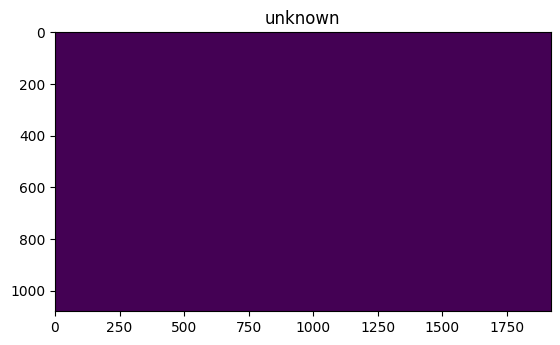

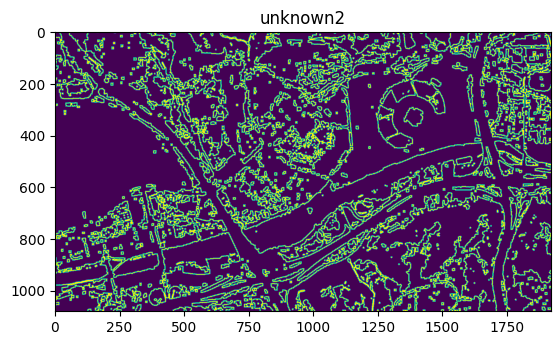

In [13]:
sure_fg = np.uint8(sure_bg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.title("unknown")
plt.show()

# USING WEBSITE CODE

sure_fg2 = np.uint8(sure_fg2)
unknown2 = cv.subtract(sure_bg2,sure_fg2)
plt.imshow(unknown2)
plt.title("unknown2")
plt.show()

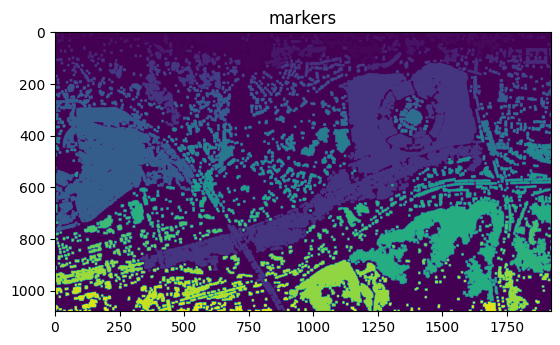

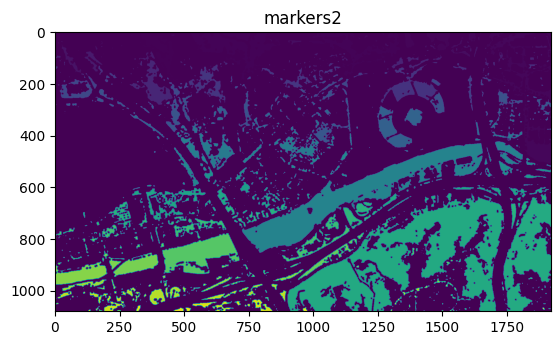

In [14]:
ret, markers = cv.connectedComponents(sure_fg)
markers = markers+1
plt.imshow(markers)
plt.title("markers")
plt.show()

# USING WEBSITE CODE

ret, markers2 = cv.connectedComponents(sure_fg2)
markers2 = markers2+1
plt.imshow(markers2)
plt.title("markers2")
plt.show()

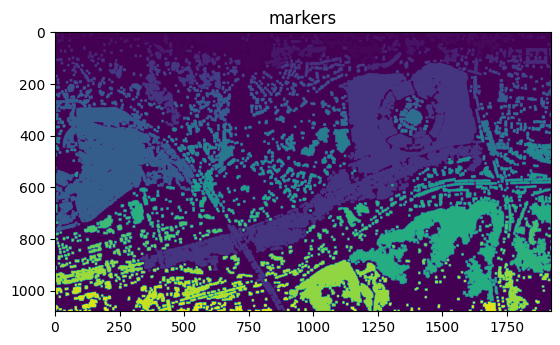

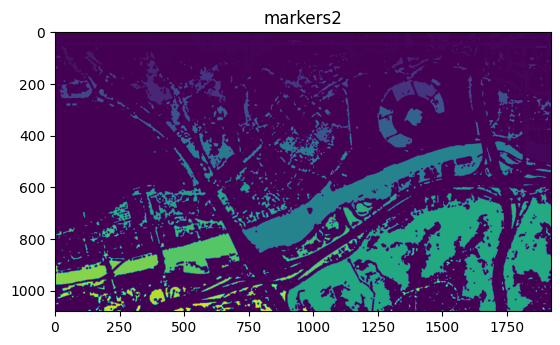

In [15]:
markers[unknown == 255] = 0
plt.imshow(markers)
plt.title("markers")
plt.show()

# USING WEBSITE CODE

markers2[unknown2 == 255] = 0
plt.imshow(markers2)
plt.title("markers2")
plt.show()

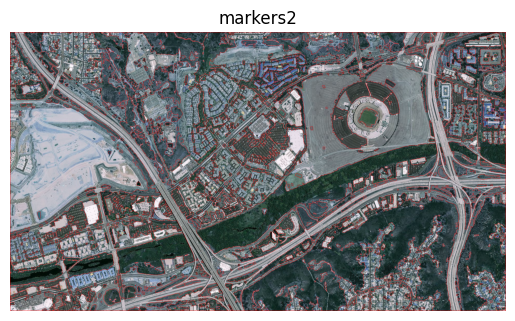

In [16]:
markers2 = cv.watershed(img, markers2)
img[markers2 == -1] = [255,0,0]
plt.imshow(img)
plt.title('markers2')
plt.axis('off')
plt.show()